In [ ]:
import numpy as np
import os

from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping


from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train= '/content/drive/MyDrive/10 types of fruits/x_train'
x_test= '/content/drive/MyDrive/10 types of fruits/x_test'

In [ ]:
x_train = ImageDataGenerator(rescale=1/255)
x_test = ImageDataGenerator(rescale=1/255)

In [ ]:
x_train_data = x_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/10 types of fruits/x_train",
    target_size=(224, 224),
    batch_size=3,
    class_mode='categorical',
    )
x_test_data = x_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/10 types of fruits/x_test",
    target_size=(224, 224),
    batch_size=3,
    class_mode= "categorical",
    )

Found 97 images belonging to 10 classes.
Found 28 images belonging to 10 classes.


In [ ]:
x_train_data.class_indices

{'apple': 0,
 'banana': 1,
 'cherry': 2,
 'coconut': 3,
 'durian': 4,
 'kiwi': 5,
 'mango': 6,
 'orange': 7,
 'pomelo': 8,
 'water melon': 9}

In [ ]:
  model = Sequential()

  model.add(Conv2D(32,(3,3),input_shape=(224,224,3),padding='same',activation='relu'))
  model.add(Dropout(0.2))

  model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(Dropout(0.2))

  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(Dropout(0.2))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dropout(0.2))



  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(100,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation='softmax'))
  model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 dropout_13 (Dropout)        (None, 224, 224, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 dropout_14 (Dropout)        (None, 112, 112, 64)      0         
                                                      

In [ ]:
from tensorflow.keras.optimizers import SGD
#opt = SGD(lr = 0.01, momentum= 0.9)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_data,
                  epochs=10,
                  batch_size=32,
                  verbose=1,
                  validation_data= x_test_data)

Epoch 1/10
33/33 [==============================] - 3s 82ms/step - loss: 1.7866 - accuracy: 0.3711 - val_loss: 2.1346 - val_accuracy: 0.2143
Epoch 2/10
33/33 [==============================] - 2s 72ms/step - loss: 1.3969 - accuracy: 0.5361 - val_loss: 2.0079 - val_accuracy: 0.2857
Epoch 3/10
33/33 [==============================] - 2s 75ms/step - loss: 1.1104 - accuracy: 0.6289 - val_loss: 2.0509 - val_accuracy: 0.1786
Epoch 4/10
33/33 [==============================] - 2s 76ms/step - loss: 1.0136 - accuracy: 0.6082 - val_loss: 2.1911 - val_accuracy: 0.2500
Epoch 5/10
33/33 [==============================] - 3s 79ms/step - loss: 1.2297 - accuracy: 0.6907 - val_loss: 2.2506 - val_accuracy: 0.0714
Epoch 6/10
33/33 [==============================] - 3s 78ms/step - loss: 0.6571 - accuracy: 0.8247 - val_loss: 2.9588 - val_accuracy: 0.1786
Epoch 7/10
33/33 [==============================] - 2s 74ms/step - loss: 0.9784 - accuracy: 0.7320 - val_loss: 3.2317 - val_accuracy: 0.1429
Epoch 8/10
33

In [ ]:
model.save('nhandientraicay.h5')

In [ ]:
from keras.models import load_model
nhandangtraicay = load_model('nhandientraicay.h5')

(1, 224, 224, 3)

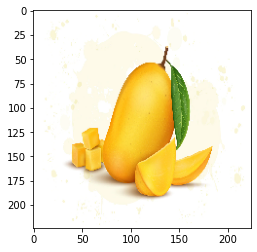

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/10 types of fruits/x_test/mango/2.jpg', target_size =(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255
img.shape

In [ ]:
np.argmax(nhandangtraicay.predict(img),axis= 1)

array([6])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


9

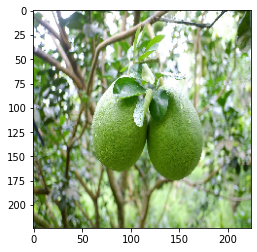

In [ ]:
# load model
img = load_img('/content/drive/MyDrive/10 types of fruits/x_test/pomelo/1.jpg', target_size =(224,224))
plt.imshow(img)
img = img_to_array(img)
img.shape
img = img.reshape(1,224,224,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 


In [ ]:
np.argmax(nhandangtraicay.predict(img),axis= 1)

array([8])